## Training

In [4]:


import os
import joblib          # 可选：保存 t-SNE 对象（仅供复现，不支持 transform）
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# ───────── 1. 读取数据 ─────────
X_trimmed = np.load('/data/hanzhe/20250424cs/X_trimmed.npy')
y_trimmed = np.load('/data/hanzhe/20250424cs/y_trimmed.npy')

# ───────── 2. 二分类标签（仅用于着色） ─────────
label_bin = (y_trimmed > 0).astype(int)   # 0: y<=0,  1: y>0
print("原始 y 唯一值:", np.unique(y_trimmed))
print("二分类后计数:", dict(zip(*np.unique(label_bin, return_counts=True))))

# ───────── 3. 运行 t-SNE ─────────
tsne = TSNE(
    n_components=2,
    perplexity=30,          # 常见经验值，可按数据量 5~50 调整
    metric='euclidean',
    init='pca',             # 加速收敛
    learning_rate='auto',   # 1e-4 * max(N, 2000) (sklearn ≥ 1.2)
    n_iter=1000,
    random_state=42,
    verbose=1
)
embedding_tsne = tsne.fit_transform(X_trimmed)   # 无监督降维

# ───────── 4. 保存结果 ─────────
output_dir = '/data/hanzhe/20250424cs/tsne'
os.makedirs(output_dir, exist_ok=True)

np.save(f'{output_dir}/embedding_tsne.npy', embedding_tsne)
#joblib.dump(tsne, f'{output_dir}/tsne_model.joblib')   # 仅用于重现同一嵌入

print("✅ t-SNE 嵌入保存到:", f'{output_dir}/embedding_tsne.npy')




原始 y 唯一值: [-1.34921374 -1.25730208 -1.23184218 ...  3.49903587  3.49917218
  3.49946047]
二分类后计数: {np.int64(0): np.int64(478), np.int64(1): np.int64(5000)}
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.001s...
[t-SNE] Computed neighbors for 5478 samples in 0.155s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 2.404707
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.848793
[t-SNE] KL divergence after 1000 iterations: 4.258321
✅ t-SNE 嵌入保存到: /data/hanzhe/20250424cs/tsne/embedding_tsne.npy


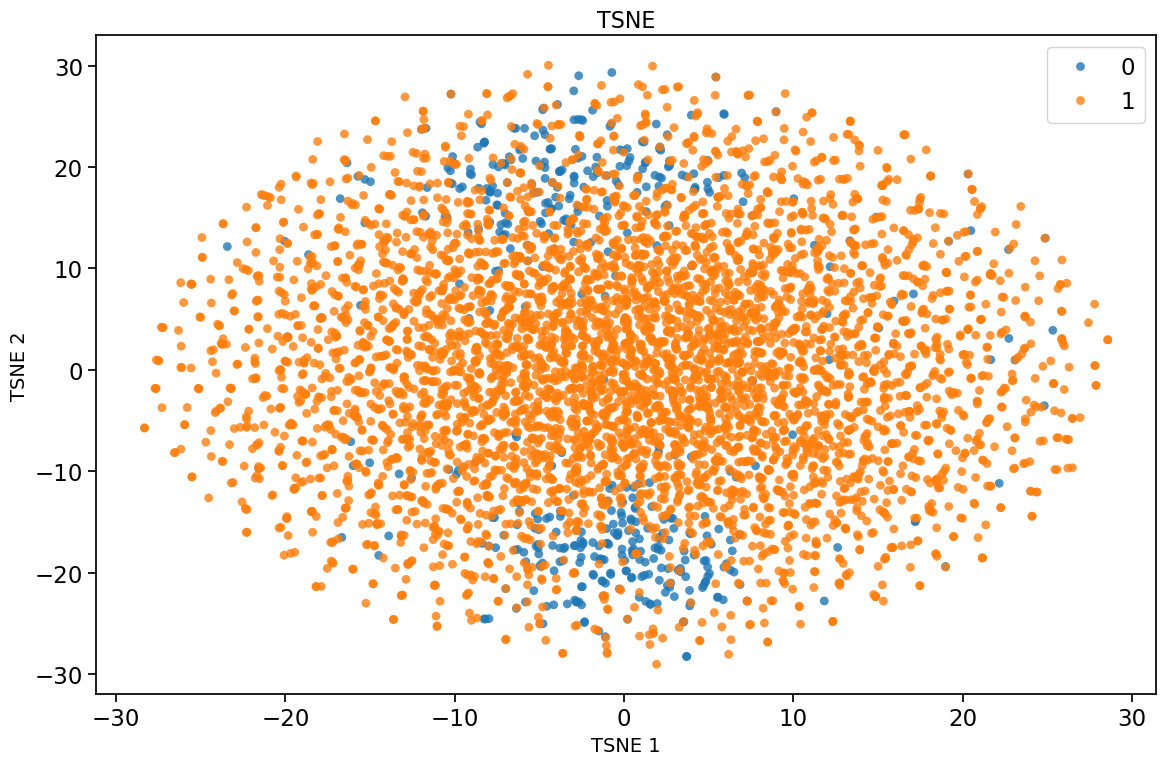

In [5]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/tsne/embedding_tsne.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("TSNE", fontsize=16)
plt.xlabel("TSNE 1", fontsize=14)
plt.ylabel("TSNE 2", fontsize=14)

plt.tight_layout()

# ───────── 4. 保存图像 ─────────
out_path = '/data/hanzhe/20250424cs/tsne/tsne_scatter_binary.png'
plt.savefig(out_path, dpi=300)
plt.show()



## Inference 无监督没有inference